In [1]:
import igraph
import pandas as pd
from pathlib import Path
from igraph import Graph, plot
import random

In [2]:
path1=Path("/home/ebri/data_work")

In [3]:
path12=Path("/Users/zainabnazari/data_work")

In [3]:
file_d = pd.read_csv(path1/'only_6M_12M_mRNA_DEGs_FDR_5pc_1_5fc_filtered_Log2CPM_TMM_Norm_HtSeq_Union_paired_reads_counts_GTF_gene.txt', delimiter='\t')

In [4]:
file_d['SampleID'].to_csv(path1/'list.txt', index=False,header=False)

In [5]:
file_no1 = pd.read_csv(path1/'string_interactions_short.tsv', delimiter='\t')
file_no1

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,A2m,Mmp9,10090.ENSMUSP00000032203,10090.ENSMUSP00000017881,0.000,0,0.000,0.00,0.054,0.052,0.5,0.461,0.726
1,A2m,Hspa5,10090.ENSMUSP00000032203,10090.ENSMUSP00000028222,0.000,0,0.000,0.00,0.054,0.084,0.0,0.958,0.960
2,A2m,Ttr,10090.ENSMUSP00000032203,10090.ENSMUSP00000074783,0.000,0,0.000,0.00,0.087,0.000,0.0,0.739,0.752
3,Acad8,Eci3,10090.ENSMUSP00000054370,10090.ENSMUSP00000021853,0.062,0,0.000,0.00,0.660,0.098,0.0,0.177,0.731
4,Ace,Ins2,10090.ENSMUSP00000001963,10090.ENSMUSP00000147425,0.000,0,0.000,0.00,0.045,0.000,0.0,0.742,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Slc12a2,Slc4a2,10090.ENSMUSP00000111023,10090.ENSMUSP00000078972,0.000,0,0.000,0.00,0.062,0.000,0.0,0.730,0.736
96,Slc28a3,Slc29a4,10090.ENSMUSP00000022036,10090.ENSMUSP00000059896,0.000,0,0.000,0.00,0.057,0.000,0.0,0.742,0.746
97,Steap1,Steap2,10090.ENSMUSP00000015796,10090.ENSMUSP00000111086,0.000,0,0.064,0.92,0.581,0.000,0.9,0.427,0.974
98,Stra6,Ttr,10090.ENSMUSP00000130232,10090.ENSMUSP00000074783,0.000,0,0.000,0.00,0.045,0.000,0.5,0.637,0.811


In [6]:
file_no1.rename(columns={"#node1": "node1"}, inplace=True)


In [7]:
file_no11=file_no1[['node1','node2','combined_score']]

In [8]:
file_no11

,node1,node2,combined_score
0,A2m,Mmp9,0.726
1,A2m,Hspa5,0.960
2,A2m,Ttr,0.752
3,Acad8,Eci3,0.731
4,Ace,Ins2,0.743
...,...,...,...
95,Slc12a2,Slc4a2,0.736
96,Slc28a3,Slc29a4,0.746
97,Steap1,Steap2,0.974
98,Stra6,Ttr,0.811


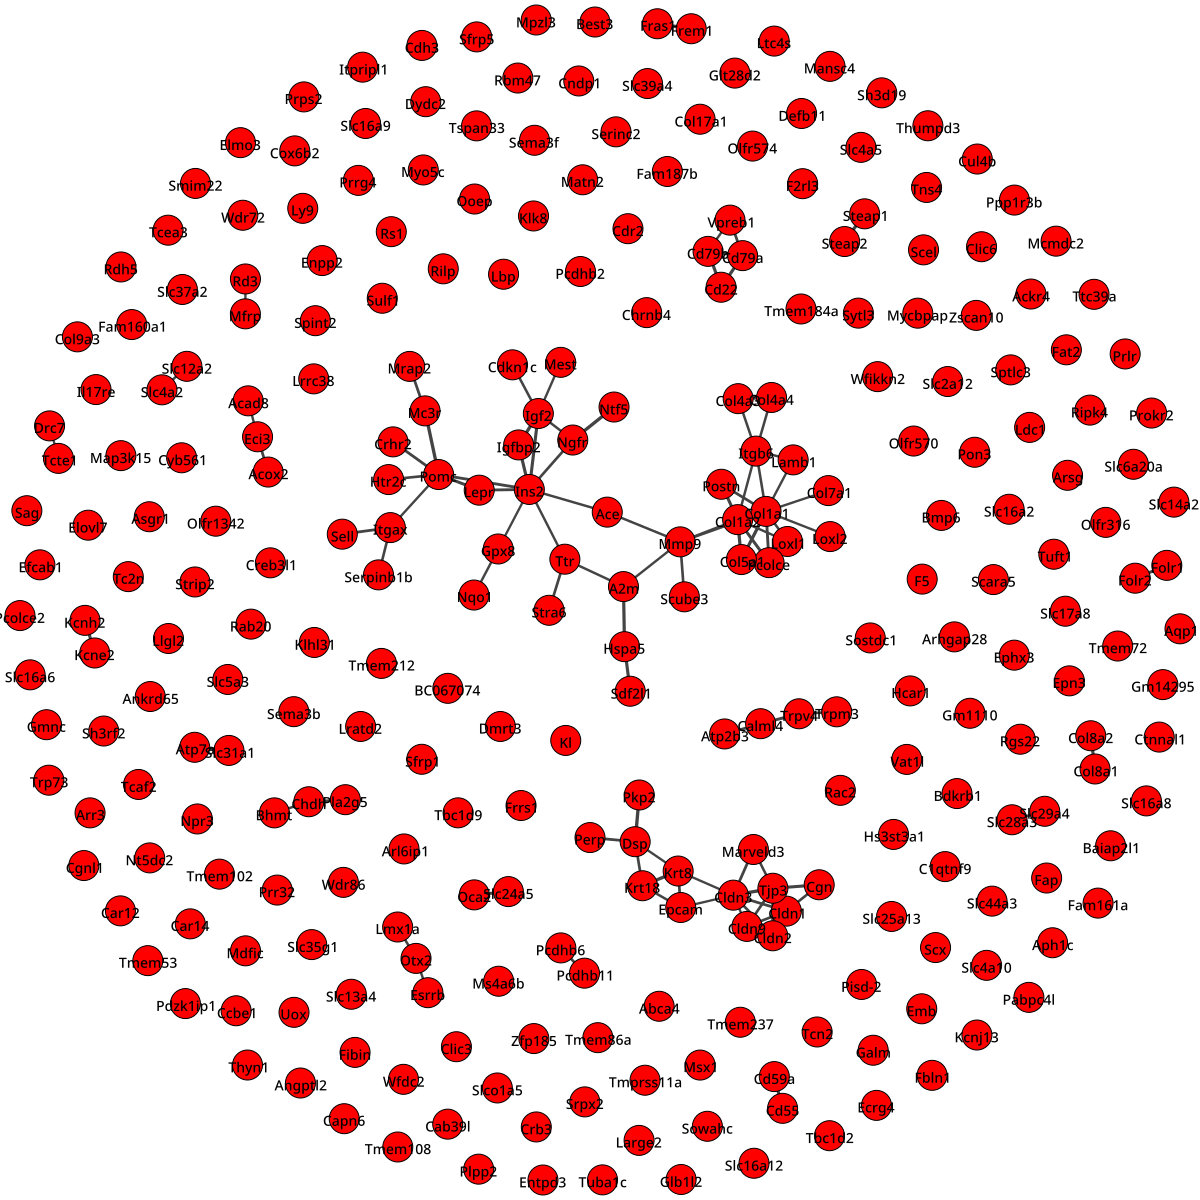

In [21]:
# Create an igraph Graph object from the edge list
g = Graph.TupleList(file_no11.itertuples(index=False), directed=False, weights=True)

# Assign vertex labels using the 'name' attribute
g.vs["label"] = g.vs["name"]

# Extract existing node names from the graph
existing_nodes = set(g.vs["name"])

# Extract new nodes from file_no2
new_nodes = set(file_no2["#node"]) - existing_nodes  # Avoid duplicates

# Add new nodes to the graph
for node in new_nodes:
    g.add_vertex(name=node, label=node)

# Print the node names to verify
#print("Nodes in the graph:", g.vs["name"])

# Print the edges to verify connections
#print("Edges in the graph:", g.get_edgelist())

# Plot the graph with weighted edges
plot(g, bbox=(1200,1200), vertex_size=30, edge_width=[w / 0.3 for w in g.es["weight"]])


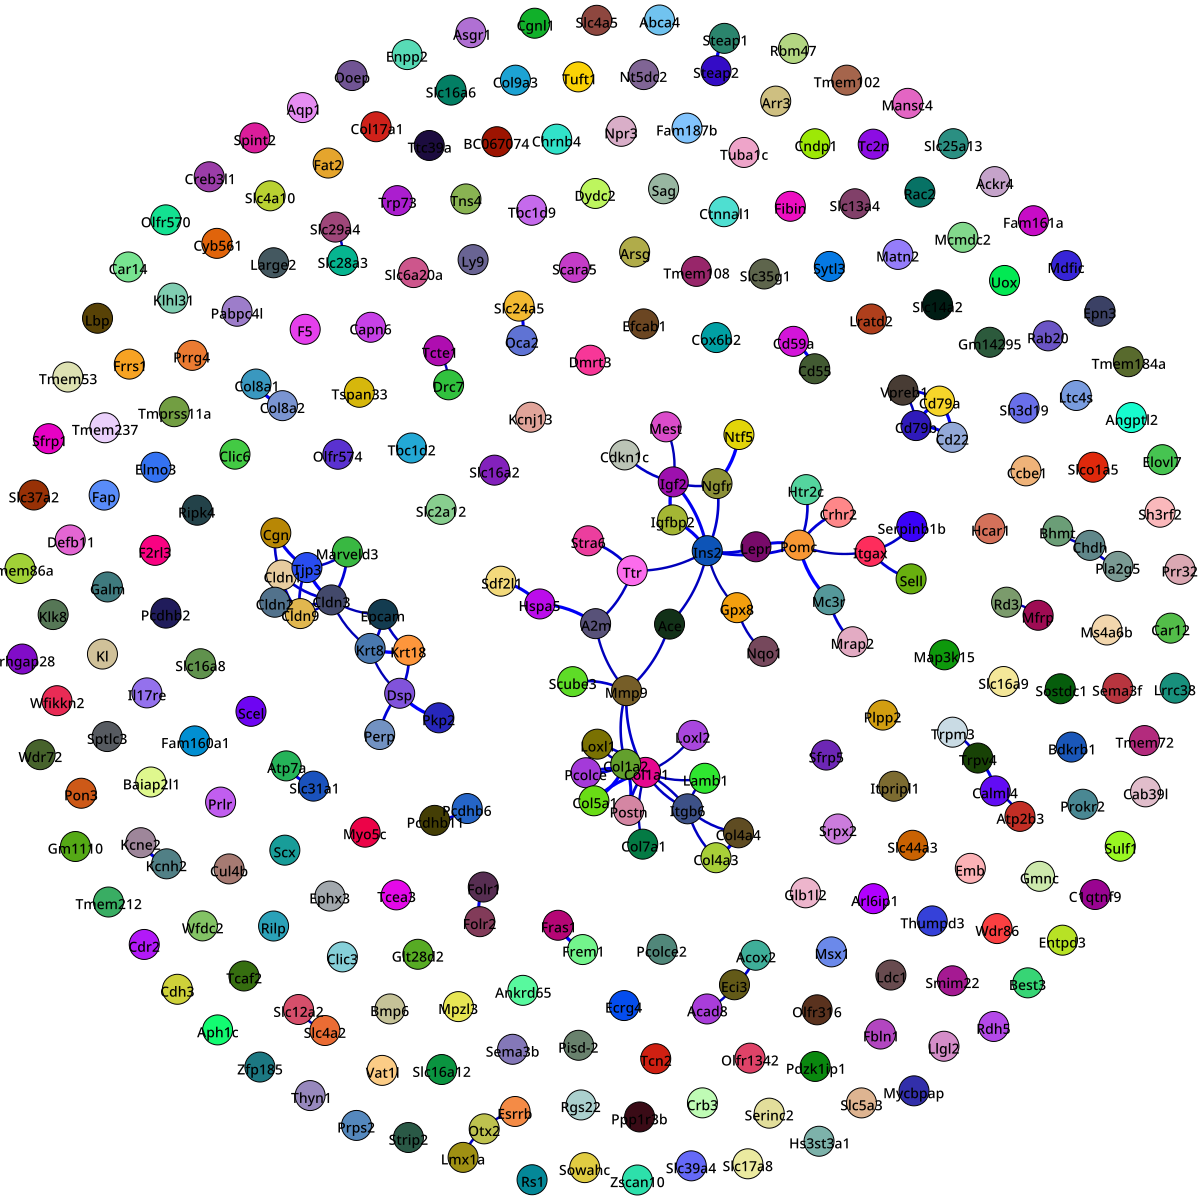

In [24]:
# Create an igraph Graph object from the edge list
g = Graph.TupleList(file_no11.itertuples(index=False), directed=False, weights=True)

# Assign vertex labels using the 'name' attribute
g.vs["label"] = g.vs["name"]

# Extract existing node names from the graph
existing_nodes = set(g.vs["name"])

# Extract new nodes from file_no2
new_nodes = set(file_no2["#node"]) - existing_nodes  # Avoid duplicates

# Add new nodes to the graph
for node in new_nodes:
    g.add_vertex(name=node, label=node)
# Assign vertex colors based on some criteria (e.g., random colors)
g.vs["color"] = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(len(g.vs))]

# Assign edge colors based on weight (stronger connections have darker shades)
edge_colors = ['#%02X%02X%02X' % (0, 0, int(255 * (weight / max(g.es["weight"])))) for weight in g.es["weight"]]
g.es["color"] = edge_colors

# Print the node names to verify
#print("Nodes in the graph:", g.vs["name"])

# Print the edges to verify connections
#print("Edges in the graph:", g.get_edgelist())

# Plot the graph with customized attributes
plot(g, 
     bbox=(1200, 1200), 
     vertex_size=30, 
     edge_width=[w / 0.3 for w in g.es["weight"]],
     vertex_label_color='black',  # Change vertex label color
     edge_curved=0.2,  # Slightly curved edges for better aesthetics
     margin=20)  # Add margin around the plot


In [25]:
from igraph import Graph

# Degree Centrality (Number of connections per node)
degree_centrality = g.degree()

# Betweenness Centrality (Importance based on shortest paths)
betweenness_centrality = g.betweenness()

# Closeness Centrality (Inverse of the average shortest path distance)
closeness_centrality = g.closeness()

# Eigenvector Centrality (Importance based on connections to important nodes)
eigenvector_centrality = g.eigenvector_centrality()

# PageRank (Google’s ranking algorithm for importance)
pagerank = g.pagerank()

# Print the computed metrics
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("PageRank:", pagerank)


Degree Centrality: [3, 5, 2, 3, 1, 2, 2, 8, 1, 1, 2, 1, 1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 1, 5, 2, 5, 6, 1, 3, 3, 7, 2, 4, 3, 10, 1, 1, 2, 3, 5, 2, 4, 3, 7, 2, 2, 1, 1, 1, 6, 1, 1, 4, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Betweenness Centrality: [98.0, 327.0, 36.0, 90.0, 0.0, 1.0, 252.0, 427.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.5, 0.5, 0

In [26]:
# Diameter (Longest shortest path in the graph)
diameter = g.diameter()

# Average Path Length
average_path_length = g.average_path_length()

# Density (How connected the graph is)
density = g.density()

# Clustering Coefficient (How likely neighbors of a node are connected)
clustering_coefficient = g.transitivity_undirected()

print("Graph Diameter:", diameter)
print("Average Path Length:", average_path_length)
print("Graph Density:", density)
print("Clustering Coefficient:", clustering_coefficient)


Graph Diameter: 8
Average Path Length: 3.6846625766871166
Graph Density: 0.002506077237300454
Clustering Coefficient: 0.3372093023255814


In [13]:
file_no2 = pd.read_csv(path1/'string_protein_annotations.tsv', delimiter='\t')
file_no2

,#node,identifier,domain_summary_url,annotation,other_names_and_aliases
0,A2m,10090.ENSMUSP00000032203,Alpha-2-macroglobulin-P; Is able to inhibit al...,https://smart.embl.de/smart/DDvec.cgi?smart=14...,"232345,A0A0N4SUX6,A2MG_MOUSE,A2m,A2m-201,A2m-2..."
1,Abca4,10090.ENSMUSP00000013995,Retinal-specific phospholipid-transporting ATP...,https://smart.embl.de/smart/DDvec.cgi?smart=23...,"11304,7.6.2.1,A0A0G2JGG8,AAC23916.1,AAH57853.1..."
2,Acad8,10090.ENSMUSP00000054370,"Isobutyryl-CoA dehydrogenase, mitochondrial; I...",https://smart.embl.de/smart/DDvec.cgi?smart=41...,"1.3.8.-,1.3.99.-,2310016C19Rik,66948,A0A0R4J0P..."
3,Ace,10090.ENSMUSP00000001963,"Angiotensin-converting enzyme, soluble form; C...",https://smart.embl.de/smart/DDvec.cgi?smart=13...,"11421,3.2.1.-,3.4.15.1,AAA37146.1,AAA37147.1,A..."
4,Ackr4,10090.ENSMUSP00000075507,Atypical chemokine receptor 4; Atypical chemok...,https://smart.embl.de/smart/DDvec.cgi?smart=35...,"252837,A630091E18Rik,AAK81712.1,AAL68400.1,AAL..."
...,...,...,...,...,...
278,Wdr86,10090.ENSMUSP00000064785,WD repeat domain 86.,https://smart.embl.de/smart/DDvec.cgi?smart=38...,"269633,2810046M22Rik,AC137938,BC059069,CCDS390..."
279,Wfdc2,10090.ENSMUSP00000017867,WAP four-disulfide core domain protein 2; Broa...,https://smart.embl.de/smart/DDvec.cgi?smart=17...,"1600023A02Rik,67701,A2A5G4,A2A5G5,A2A5G6,AAH99..."
280,Wfikkn2,10090.ENSMUSP00000053238,"WAP, Kazal, immunoglobulin, Kunitz and NTR dom...",https://smart.embl.de/smart/DDvec.cgi?smart=57...,"2610304F08Rik,278507,6MAA,AAP72503.1,AL645846,..."
281,Zfp185,10090.ENSMUSP00000126066,Zinc finger protein 185; May be involved in th...,https://smart.embl.de/smart/DDvec.cgi?smart=48...,"22673,A2BI37,AL807751,B1AXE7,BX813330,CCDS3019..."


In [14]:
file_no2['#node']

0          A2m
1        Abca4
2        Acad8
3          Ace
4        Ackr4
        ...   
278      Wdr86
279      Wfdc2
280    Wfikkn2
281     Zfp185
282    Zscan10
Name: #node, Length: 283, dtype: object